# Symmetrische Verteilungen für 2 Variablen - Interaktive Plots

Dieses Notebook zeigt verschiedene Möglichkeiten, symmetrische bivariate Verteilungen zu visualisieren.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal
import plotly.graph_objects as go
import plotly.express as px
from ipywidgets import interact, FloatSlider

# Style settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 1. Grundfunktion für symmetrische Daten

In [3]:
def generate_symmetric_data(n_samples=1000, correlation=0.0, mean_x=0, mean_y=0, std_x=1, std_y=1):
    """
    Generiert symmetrische bivariate Normalverteilungsdaten
    
    Parameter:
    n_samples: Anzahl der Stichproben
    correlation: Korrelationskoeffizient zwischen Variablen (-1 bis 1)
    mean_x, mean_y: Mittelwerte der Variablen
    std_x, std_y: Standardabweichungen der Variablen
    """
    # Mittelwertvektor
    mean = [mean_x, mean_y]
    
    # Kovarianzmatrix
    cov = [[std_x**2, correlation * std_x * std_y], 
           [correlation * std_x * std_y, std_y**2]]
    
    # Generiere Stichproben
    data = np.random.multivariate_normal(mean, cov, n_samples)
    return data

## 2. Interaktiver Plot mit Schiebereglern

In [4]:
def interactive_plot(correlation=0.0, n_samples=1000):
    """
    Interaktiver Plot mit veränderbaren Parametern
    """
    # Generiere Daten
    data = generate_symmetric_data(n_samples, correlation)
    x, y = data[:, 0], data[:, 1]
    
    # Erstelle Plot
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Scatter Plot
    axes[0].scatter(x, y, alpha=0.6, s=20)
    axes[0].set_xlabel('Variable X')
    axes[0].set_ylabel('Variable Y')
    axes[0].set_title(f'Scatter Plot (ρ = {correlation:.2f})')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xlim(-4, 4)
    axes[0].set_ylim(-4, 4)
    
    # Hexbin Plot
    axes[1].hexbin(x, y, gridsize=20, cmap='Blues')
    axes[1].set_xlabel('Variable X')
    axes[1].set_ylabel('Variable Y')
    axes[1].set_title(f'Density Plot (ρ = {correlation:.2f})')
    axes[1].set_xlim(-4, 4)
    axes[1].set_ylim(-4, 4)
    
    plt.tight_layout()
    plt.show()
    
    # Zeige Statistiken
    actual_corr = np.corrcoef(x, y)[0, 1]
    print(f"Gewünschte Korrelation: {correlation:.3f}")
    print(f"Tatsächliche Korrelation: {actual_corr:.3f}")
    print(f"Anzahl Stichproben: {n_samples}")

# Interaktive Widgets
interact(interactive_plot, 
         correlation=FloatSlider(min=-0.95, max=0.95, step=0.05, value=0.0, description='Korrelation:'),
         n_samples=FloatSlider(min=100, max=2000, step=100, value=1000, description='Stichproben:'));

interactive(children=(FloatSlider(value=0.0, description='Korrelation:', max=0.95, min=-0.95, step=0.05), Floa…

## 3. Kontour-Plots mit verschiedenen Korrelationen

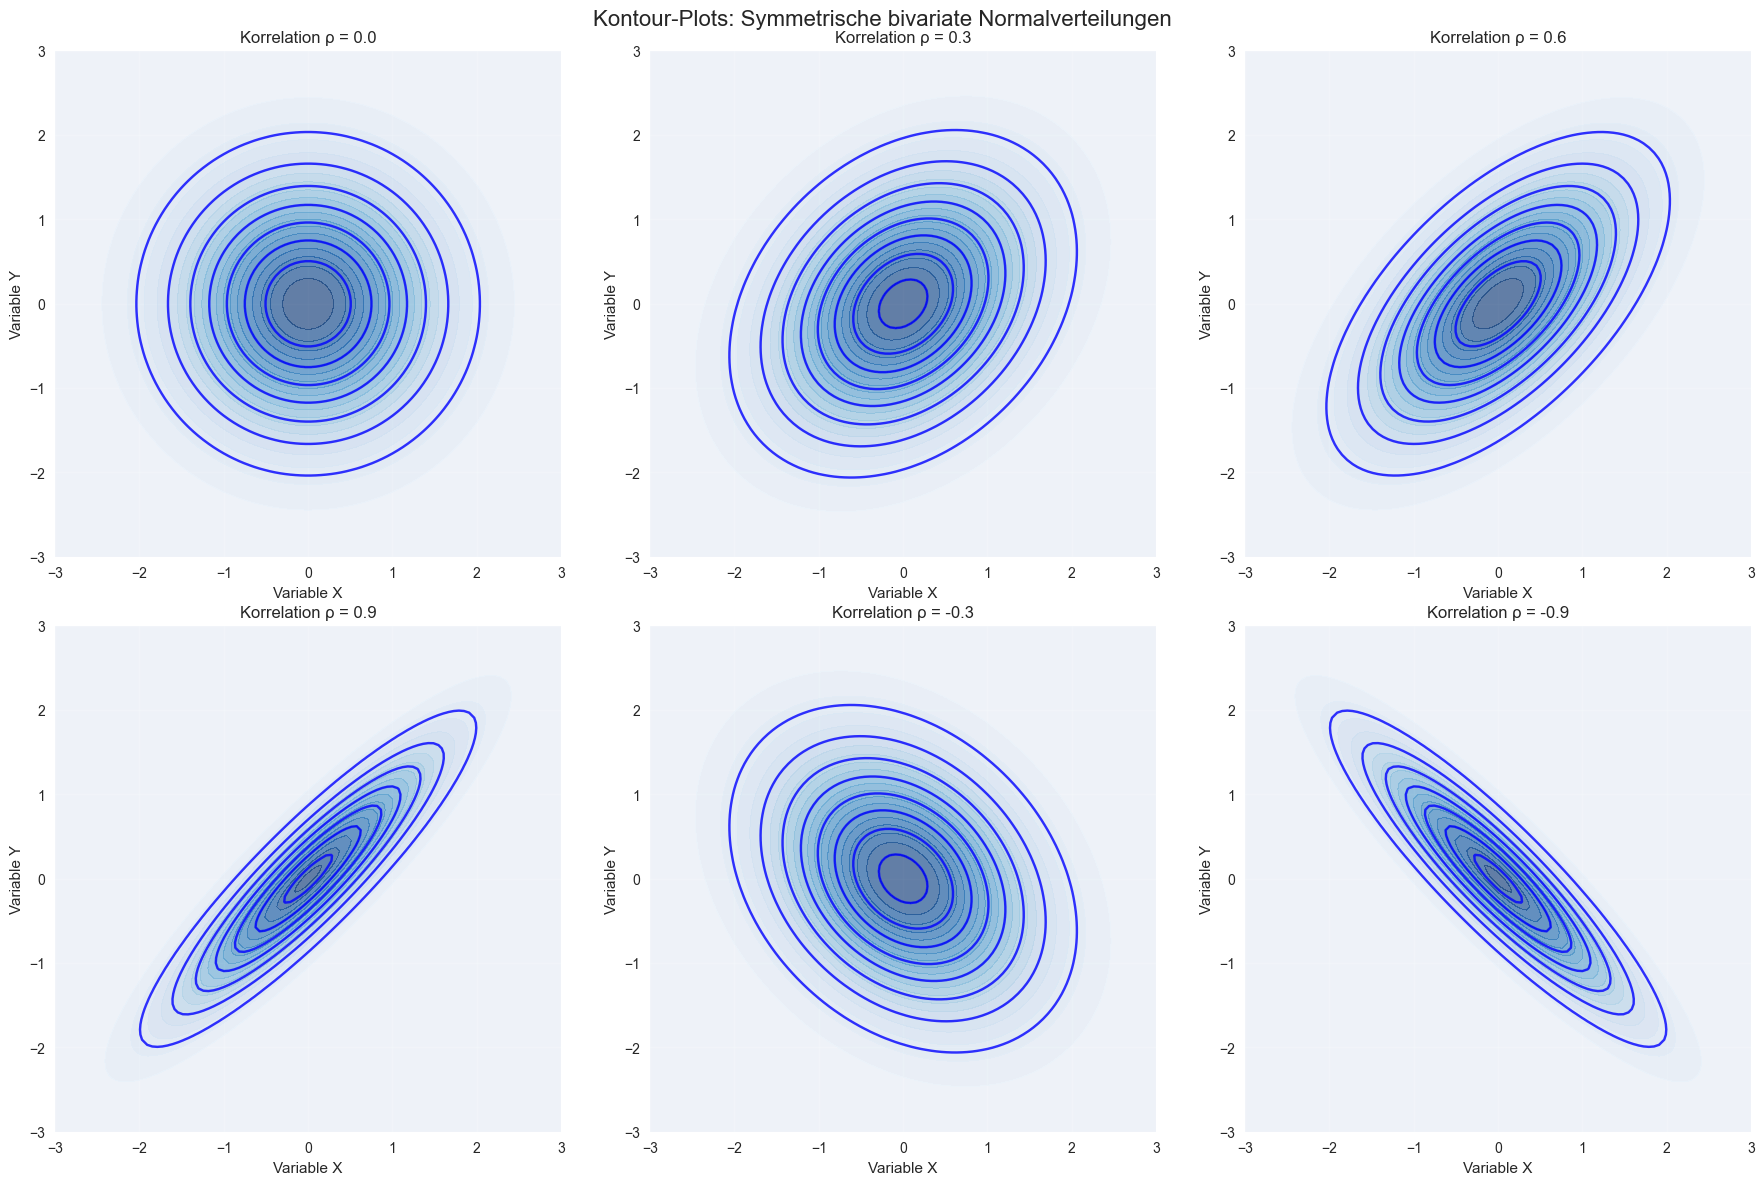

In [5]:
def plot_contours():
    """Erstelle Kontour-Plots für verschiedene Korrelationen"""
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    correlations = [0.0, 0.3, 0.6, 0.9, -0.3, -0.9]
    
    # Erstelle Gitter für Kontour-Plots
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)
    
    for i, corr in enumerate(correlations):
        row = i // 3
        col = i % 3
        ax = axes[row, col]
        
        # Definiere multivariate Normalverteilung
        mean = [0, 0]
        cov = [[1, corr], [corr, 1]]
        rv = multivariate_normal(mean, cov)
        
        # Berechne Wahrscheinlichkeitsdichte
        pos = np.dstack((X, Y))
        Z = rv.pdf(pos)
        
        # Erstelle Kontour-Plot
        contour = ax.contour(X, Y, Z, levels=8, colors='blue', alpha=0.8)
        ax.contourf(X, Y, Z, levels=20, cmap='Blues', alpha=0.6)
        
        ax.set_xlabel('Variable X')
        ax.set_ylabel('Variable Y')
        ax.set_title(f'Korrelation ρ = {corr}')
        ax.grid(True, alpha=0.3)
        ax.set_aspect('equal')
    
    plt.suptitle('Kontour-Plots: Symmetrische bivariate Normalverteilungen', fontsize=16)
    plt.tight_layout()
    plt.show()

plot_contours()

## 4. 3D Interaktive Plots mit Plotly

In [6]:
def create_3d_interactive_plot(correlation=0.5):
    """Erstelle interaktiven 3D Plot mit Plotly"""
    # Erstelle Gitter
    x = np.linspace(-3, 3, 50)
    y = np.linspace(-3, 3, 50)
    X, Y = np.meshgrid(x, y)
    
    # Definiere Verteilung
    mean = [0, 0]
    cov = [[1, correlation], [correlation, 1]]
    rv = multivariate_normal(mean, cov)
    
    # Berechne Dichte
    pos = np.dstack((X, Y))
    Z = rv.pdf(pos)
    
    # Erstelle 3D Surface Plot
    fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z, colorscale='Viridis')])
    
    fig.update_layout(
        title=f'3D Wahrscheinlichkeitsdichte (ρ = {correlation})',
        scene=dict(
            xaxis_title='Variable X',
            yaxis_title='Variable Y',
            zaxis_title='Wahrscheinlichkeitsdichte'
        ),
        autosize=False,
        width=800,
        height=600,
    )
    
    fig.show()

# Erstelle mehrere 3D Plots
for corr in [0.0, 0.7, -0.7]:
    create_3d_interactive_plot(corr)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## 5. Vergleich verschiedener symmetrischer Verteilungen

In [ ]:
def compare_distributions():
    """Vergleiche verschiedene Arten symmetrischer Verteilungen"""
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    n_samples = 1000
    
    # 1. Bivariate Normalverteilung
    ax1 = axes[0, 0]
    data1 = generate_symmetric_data(n_samples, 0.0)
    ax1.scatter(data1[:, 0], data1[:, 1], alpha=0.6, s=15)
    ax1.set_title('Bivariate Normalverteilung\n(unabhängig)')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(-4, 4)
    ax1.set_ylim(-4, 4)
    
    # 2. Kreissymmetrische Verteilung
    ax2 = axes[0, 1]
    theta = np.random.uniform(0, 2*np.pi, n_samples)
    r = np.random.rayleigh(1, n_samples)
    x2 = r * np.cos(theta)
    y2 = r * np.sin(theta)
    ax2.scatter(x2, y2, alpha=0.6, s=15, c='orange')
    ax2.set_title('Kreissymmetrische Verteilung\n(Rayleigh-Radius)')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.grid(True, alpha=0.3)
    ax2.set_xlim(-4, 4)
    ax2.set_ylim(-4, 4)
    
    # 3. Gleichverteilung auf Quadrat
    ax3 = axes[1, 0]
    x3 = np.random.uniform(-2, 2, n_samples)
    y3 = np.random.uniform(-2, 2, n_samples)
    ax3.scatter(x3, y3, alpha=0.6, s=15, c='green')
    ax3.set_title('Gleichverteilung\n(Quadrat)')
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.grid(True, alpha=0.3)
    ax3.set_xlim(-4, 4)
    ax3.set_ylim(-4, 4)
    
    # 4. Korrelierte Normalverteilung
    ax4 = axes[1, 1]
    data4 = generate_symmetric_data(n_samples, 0.8)
    ax4.scatter(data4[:, 0], data4[:, 1], alpha=0.6, s=15, c='purple')
    ax4.set_title('Korrelierte Normalverteilung\n(ρ = 0.8)')
    ax4.set_xlabel('X')
    ax4.set_ylabel('Y')
    ax4.grid(True, alpha=0.3)
    ax4.set_xlim(-4, 4)
    ax4.set_ylim(-4, 4)
    
    plt.suptitle('Vergleich verschiedener symmetrischer Verteilungen', fontsize=16)
    plt.tight_layout()
    plt.show()

compare_distributions()

## 6. Statistische Analyse

In [ ]:
def analyze_symmetry():
    """Analysiere Symmetrie-Eigenschaften der generierten Daten"""
    correlations = [0.0, 0.5, 0.8, -0.5, -0.8]
    n_samples = 2000
    
    print("Analyse der Symmetrie-Eigenschaften:")
    print("=" * 50)
    
    for corr in correlations:
        data = generate_symmetric_data(n_samples, corr)
        x, y = data[:, 0], data[:, 1]
        
        # Statistiken berechnen
        mean_x, mean_y = np.mean(x), np.mean(y)
        std_x, std_y = np.std(x), np.std(y)
        actual_corr = np.corrcoef(x, y)[0, 1]
        skew_x = scipy.stats.skew(x)
        skew_y = scipy.stats.skew(y)
        
        print(f"\nKorrelation (theoretisch): {corr:.2f}")
        print(f"Korrelation (empirisch):   {actual_corr:.3f}")
        print(f"Mittelwerte: X = {mean_x:.3f}, Y = {mean_y:.3f}")
        print(f"Standardabweichungen: X = {std_x:.3f}, Y = {std_y:.3f}")
        print(f"Schiefe: X = {skew_x:.3f}, Y = {skew_y:.3f}")

import scipy.stats
analyze_symmetry()

## Zusammenfassung

Dieses Notebook zeigt verschiedene Methoden zur Visualisierung symmetrischer bivariater Verteilungen:

1. **Scatter Plots**: Grundlegende Punktwolken-Darstellung
2. **Kontour Plots**: Höhenlinien der Wahrscheinlichkeitsdichte
3. **3D Plots**: Dreidimensionale Oberflächendarstellung
4. **Interaktive Plots**: Dynamische Anpassung der Parameter
5. **Vergleichsplots**: Unterschiedliche Verteilungstypen nebeneinander

### Wichtige Parameter:
- **Korrelation (ρ)**: Bestimmt die lineare Abhängigkeit zwischen den Variablen
- **Mittelwerte**: Verschieben das Zentrum der Verteilung
- **Standardabweichungen**: Bestimmen die Streuung
- **Stichprobengröße**: Beeinflusst die Glättheit der Darstellung